In [ ]:
import numpy as np
from sklearn import preprocessing, svm, model_selection, neighbors
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
style.use('ggplot')

In [ ]:
df = pd.read_csv('sample_data/breast-cancer-wisconsin.csv')

In [ ]:
df.replace('?', -99999, inplace=True)

In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
x = np.array(df.drop(['class'], axis=1))
y = np.array(df['class'])

In [ ]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2)

In [ ]:
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [ ]:
accuracy = clf.score(x_test,y_test)
accuracy

0.6714285714285714

# Creando mi SVM

In [ ]:
class Support_Vector_Machine:
  def __init__(self, visualization=True):
    self.visualization = visualization
    self.colors = {1:'r',-1:'b'}
    if self.visualization:
      self.fig = plt.figure()
      self.ax=self.fig.add_subplot(1,1,1)
  # Train
  def fit(self, data):
    self.data = data
    # { ||w||:[w,b]}
    opt_dict = {}
    transforms = [[1,1],
                  [-1,1],
                  [-1,-1],
                  [1,-1],]
    all_data = []
    for yi in self.data:
      for featureset in self.data[yi]:
        for feature in featureset:
          all_data.append(feature)
    self.max_feature_value = max(all_data)
    self.min_feature_value = min(all_data)
    all_data = None

    step_sizes = [self.max_feature_value * 0.1,
                  self.max_feature_value * 0.01,
                  # point of expense
                  self.max_feature_value * 0.001,]
    # extremely expensive
    b_range_multiple = 5

    b_multiple = 5

    latest_optimum = self.max_feature_value*10

    for step in step_sizes:
      w = np.array([latest_optimum,latest_optimum])

      # We can do this because convex
      optimized = False
      while not optimized:
        for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                           self.max_feature_value*b_range_multiple,
                           step*b_multiple):
          for transformation in transforms:
            w_t = w*transformation
            found_option = True
            # weakest link in the SVM fundamentaly
            # SMO attempts to fix this a bit
            # Constraint function: yi(xi.w+b) >= 1

            ### add a break here later...
            for i in self.data:
              for xi in self.data[i]:
                yi = i
                if not yi*(np.dot(w_t,xi) + b) >= 1:
                  found_option = False
            if found_option:
              opt_dict[np.linalg.norm(w_t)] = [[w_t,b]]
        if w[0] < 0:
          optimized = True
          print ('Optimized step:')
        else:
          w = w - step
      norms = sorted([n for n in opt_dict])
      # ||w|| = [w,b]
      opt_choice = opt_dict[norms[0]][0]
      self.w = opt_choice[0]
      self.b = opt_choice[1]
      latest_optimum = opt_choice[0][0]+step*2

  def predict(self, features):
    # sign(x.w+b)
    classification = np.sign(np.dot(np.array(features),self.w)+self.b)
    if classification != 0 and self.visualization:
      self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
    return classification
  def visualize(self):
    [[self.ax.scatter(x[0],x[1],s=100,color=self.colors[i]) for x in data_dict[i]] for i in data_dict]
    # hyperplane = x.w+b
    def hyperplane(x,w,b,v):
      return (-w[0]*x - b + v) / w[1]
    datarange = (self.min_feature_value*0.9,self.max_feature_value*1.1)
    hyp_x_min = datarange[0]
    hyp_x_max = datarange[1]

    # (w.x+b) = 1
    # positive support vector hyperplane
    psv1 = hyperplane(hyp_x_min,self.w,self.b,1)
    psv2 = hyperplane(hyp_x_max,self.w,self.b,1)
    self.ax.plot([hyp_x_min,hyp_x_max],[psv1,psv2], 'k')

    # (w.x+b) = -1
    # negative support vector hyperplane
    nsv1 = hyperplane(hyp_x_min,self.w,self.b,-1)
    nsv2 = hyperplane(hyp_x_max,self.w,self.b,-1)
    self.ax.plot([hyp_x_min,hyp_x_max],[nsv1,nsv2], 'k')

    # (w.x+b) = 0
    # desicion
    db1 = hyperplane(hyp_x_min,self.w,self.b,0)
    db2 = hyperplane(hyp_x_max,self.w,self.b,0)
    self.ax.plot([hyp_x_min,hyp_x_max],[db1,db2], 'y--')

    plt.show()

In [ ]:
data_dict = {-1:np.array([[1,7],
                         [2,8],
                         [3,8],]),
            1:np.array([[5,1],
                        [6,-1],
                        [7,3],])}

Optimized step:
Optimized step:
Optimized step:


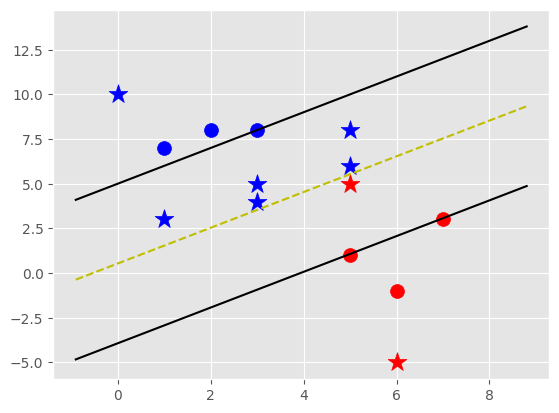

In [ ]:
svm = Support_Vector_Machine()
svm.fit(data=data_dict)

predict_us = [[0,10],
              [1,3],
              [3,4],
              [3,5],
              [5,5],
              [5,6],
              [6,-5],
              [5,8],]
for p in predict_us:
  svm.predict(p)

svm.visualize()